# Regresión Lineal simple

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
os.chdir("/Users/gilgu/OneDrive/Escritorio")

In [4]:
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


# Exploración de datos

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,3.0,6,11.0,256
7,3.0,6,11.2,261
8,2.0,4,8.7,205


<function matplotlib.pyplot.show(close=None, block=None)>

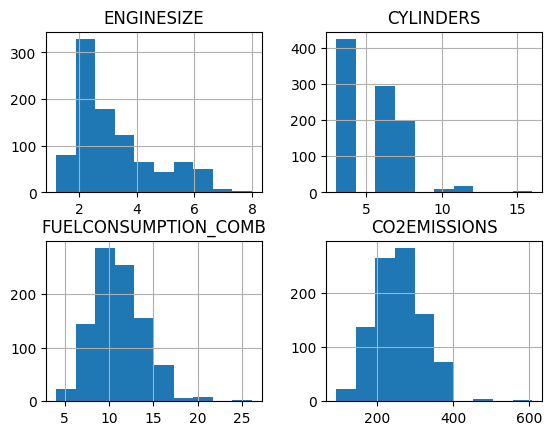

In [7]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show

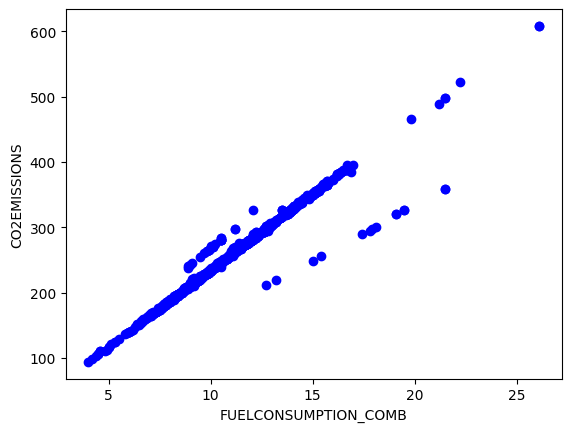

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

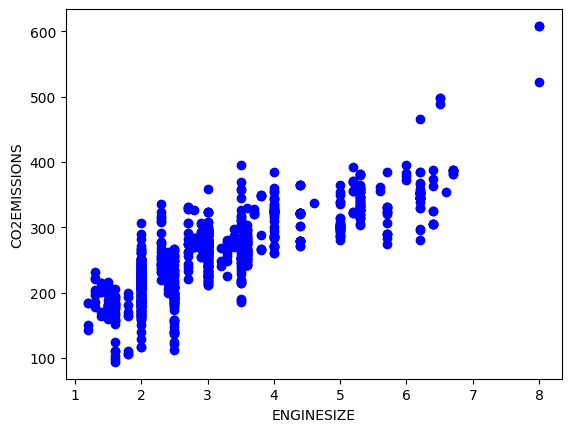

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

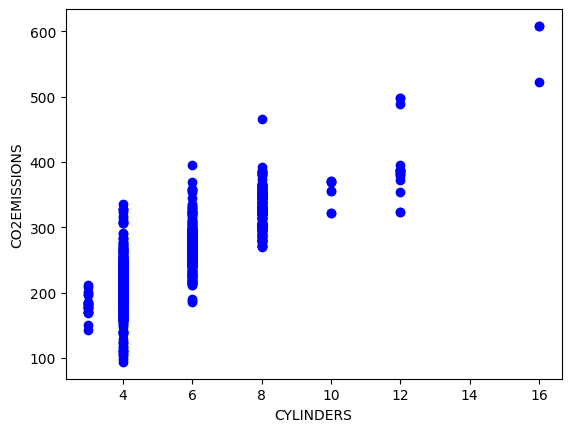

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

# Separar la base de datos en 2 partes(una para entrenamiento y otra para la prueba)

In [11]:
msk = np.random.rand(len(df)) <= 0.80     # TRUE = ese dato será contemplado como parte del grupo de entrenamiento.
msk                                       # FALSE = el dato no será parte del grupo de entrenamiento.

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
train = cdf[msk]       #valores que fueron sorteados de acuerdo a lo anterior.
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
...,...,...,...,...
939,2.0,4,9.3,217
940,2.0,4,9.4,219
941,2.0,4,9.4,219
943,2.0,4,10.1,236


In [14]:
test = cdf[~msk]       #sacar el complemento ~
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
5,2.0,4,9.8,231
6,3.0,6,11.0,256
13,2.9,6,12.3,288
19,2.0,4,7.6,178
22,2.0,4,8.9,208
...,...,...,...,...
917,3.6,6,12.2,286
919,3.6,6,11.7,275
921,2.0,4,8.5,198
926,2.0,4,7.9,185


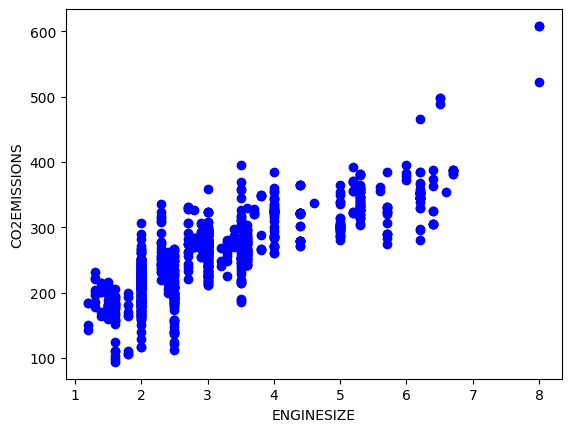

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

# empezamos la regresión

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

#Definir los datos que se van a aplicar para este caso

train_x = np.asanyarray(train[['ENGINESIZE']])   #se convierte el dataframe en un arreglo
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

LinearRegression()

In [20]:
print('Coeficiente de pendiente', regr.coef_)
print('Coeficiente de intercepto', regr.intercept_)

Coeficiente de pendiente [[38.4239764]]
Coeficiente de intercepto [136.60981666]


# Ecuación para hacer las predicciones.

#         CO2EMISSIONS = 136.60 + 38.42 (ENGINESIZE)

Text(0, 0.5, 'Emission')

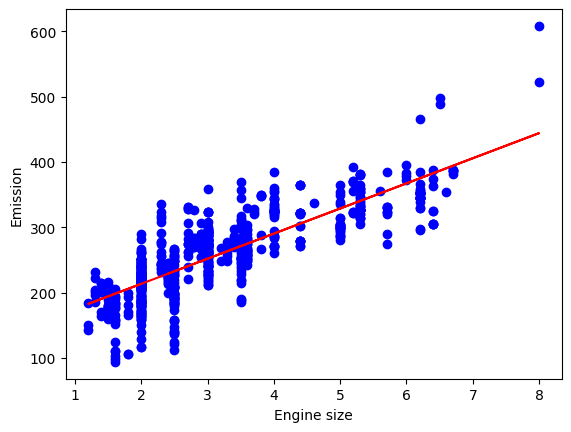

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color = 'blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluación del Error (¿qué tan bueno es el modelo?)

In [22]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

In [23]:
test_y_hat

array([[213.45776945],
       [251.88174585],
       [248.03934821],
       [213.45776945],
       [213.45776945],
       [213.45776945],
       [251.88174585],
       [213.45776945],
       [336.41449392],
       [251.88174585],
       [290.30572225],
       [213.45776945],
       [213.45776945],
       [305.6753128 ],
       [251.88174585],
       [251.88174585],
       [251.88174585],
       [305.6753128 ],
       [305.6753128 ],
       [305.6753128 ],
       [213.45776945],
       [251.88174585],
       [444.00162783],
       [274.93613169],
       [182.71858834],
       [213.45776945],
       [213.45776945],
       [213.45776945],
       [240.35455293],
       [240.35455293],
       [251.88174585],
       [213.45776945],
       [274.93613169],
       [213.45776945],
       [274.93613169],
       [374.83847032],
       [194.24578126],
       [194.24578126],
       [194.24578126],
       [340.25689156],
       [340.25689156],
       [251.88174585],
       [340.25689156],
       [340

In [24]:
test_y

array([[231],
       [256],
       [288],
       [178],
       [208],
       [205],
       [224],
       [217],
       [356],
       [262],
       [309],
       [195],
       [202],
       [279],
       [296],
       [214],
       [224],
       [322],
       [322],
       [322],
       [207],
       [241],
       [608],
       [263],
       [184],
       [209],
       [220],
       [206],
       [233],
       [244],
       [252],
       [221],
       [259],
       [222],
       [281],
       [281],
       [198],
       [208],
       [175],
       [341],
       [304],
       [265],
       [358],
       [347],
       [361],
       [385],
       [336],
       [353],
       [327],
       [332],
       [178],
       [260],
       [277],
       [242],
       [289],
       [242],
       [307],
       [289],
       [258],
       [368],
       [221],
       [310],
       [219],
       [182],
       [317],
       [326],
       [252],
       [269],
       [277],
       [225],
       [275],
      

# Error absoluto medio

In [25]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

Mean absolute error: 25.94
Residual sum of squares (MSE): 1232.87
R2-score: 0.54


# que hacer para mejorar el nivel de pronostico  (uso de una regresión múltiple)

In [28]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
           'CO2EMISSIONS']]
cdf.head(15)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230
5,2.0,4,11.3,8.1,9.8,231
6,3.0,6,12.3,9.4,11.0,256
7,3.0,6,12.3,9.8,11.2,261
8,2.0,4,10.0,7.2,8.7,205
9,2.0,4,10.5,7.7,9.2,217


In [29]:
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

print('Coeficientes  de variables independientes', regr.coef_)
print('Coeficiente de intercepto', regr.intercept_)

Coeficientes  de variables independientes [[ 0.70634335  2.44747778 20.36597987]]
Coeficiente de intercepto [17.42603579]


#   CO2EMISSIONS = 17.42603579 +  0.70634335(ENGINESIZE) +      2.44747778(CYLINDERS) + 20.36597987(FUELCONSUMPTION_COMB)

In [30]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Evaluación de los Errores:

In [31]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, y))

Mean absolute error: 6.28
Residual sum of squares (MSE): 271.74
R2-score: 0.93


# Otros modelos de regresión

In [32]:
def pol_grado1(x, Beta_0, Beta_1):
    y = Beta_0 + Beta_1 * x
    return y

In [33]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado1(x, 3, 2)
y_noise = np.random.normal(0, 1, size = x.size)
ydata = y + y_noise

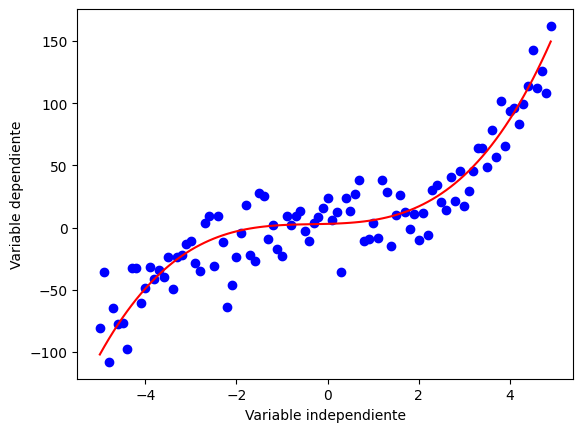

In [42]:
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

In [35]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(pol_grado1, x, ydata)

In [36]:
print("beta_0 = ", popt[0], "beta_1 = ", popt[1])

beta_0 =  3.13750327079275 beta_1 =  1.9434319449220712


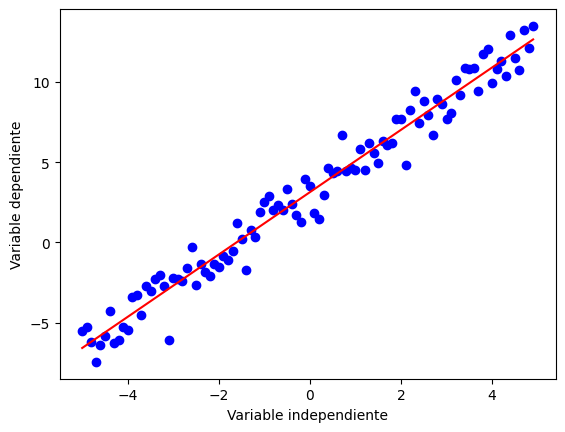

In [37]:
y_ajust = pol_grado1(x, popt[0], popt[1])
plt.plot(x, ydata, 'bo')
plt.plot(x, y_ajust, 'r')
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show() 

# Definir un modelo polinomial de tercer grado para tener un mejor ajuste

In [39]:
def pol_grado3(x, Beta_0, Beta_1, Beta_2, Beta_3):
    y = Beta_0 + Beta_1 * x + Beta_2 * (x**2) + Beta_3 * (x**3)
    return y 

In [40]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado3(x, 3, 1, 1, 1)
y_noise = 20 * np.random.normal(0, 1, size = x.size)
ydata = y + y_noise

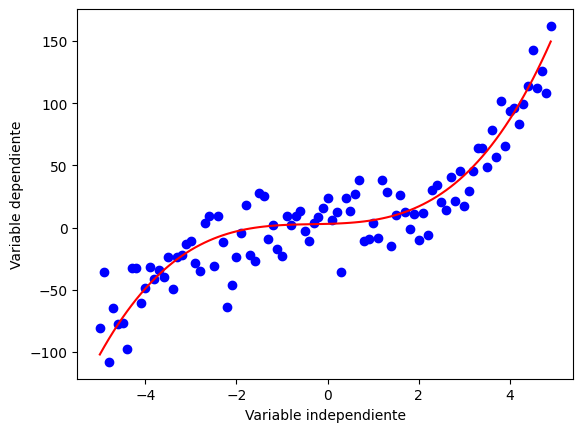

In [44]:
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

In [45]:
msk = np.random.rand(len(x)) <= 0.8
msk

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [46]:
train_x = x[msk]
test_x = x[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [47]:
popt, pcov = curve_fit(pol_grado3, train_x, train_y)

In [48]:
print("beta_0 =  ", popt[0], "beta_1 = ", popt[1], "beta_2 = ", popt[2], "beta_3 = ", popt[3])

beta_0 =   2.5000655932086486 beta_1 =  1.2994635479215528 beta_2 =  1.2374797785086102 beta_3 =  0.9049127978303336


# Predicción

In [50]:
y_hat = pol_grado3(test_x, *popt)

In [51]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat, test_y))

Mean absolute error: 19.61
Residual sum of squares (MSE): 617.32
R2-score: 0.58


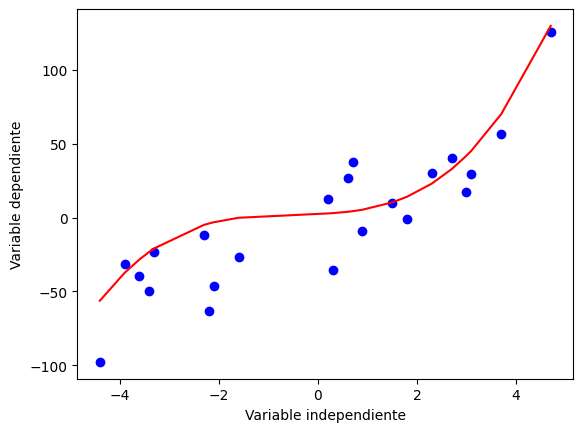

In [52]:
plt.plot(test_x, test_y, 'bo')
plt.plot(test_x,y_hat, 'r')
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

# Modelo exponencial.

# Y = a + b *  exp (X)

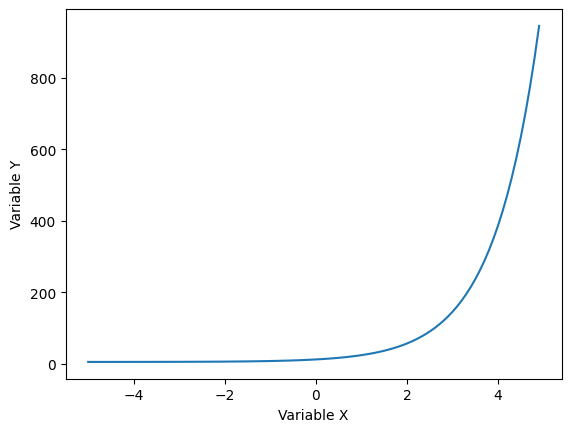

In [53]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 5 + 7 * np.exp(X)

plt.plot(X, Y)
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.show()

# Modelo logarítmico

# Y = a + b * ln (X)

C:\Users\gilgu\AppData\Local\Temp\ipykernel_22376\2690962801.py:2: RuntimeWarning: invalid value encountered in log
  Y = 2 + 6 * np.log(X)


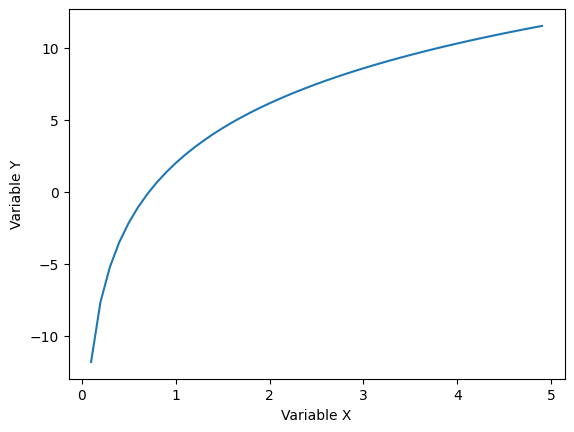

In [54]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 2 + 6 * np.log(X)

plt.plot(X, Y)
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.show()

# Modelo Sigmoidal ó Logístico

#   Y = a + (b / (1 + c ** (X - d)))

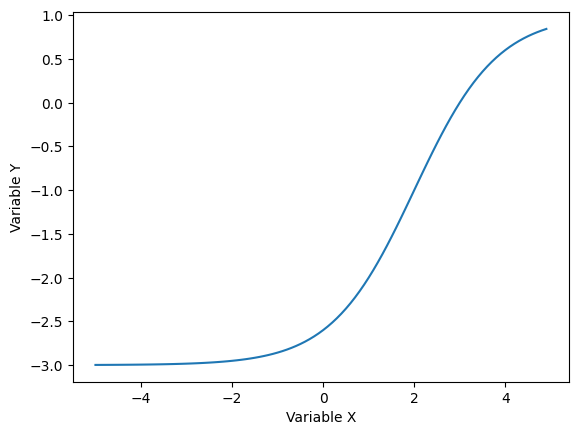

In [56]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4 / (1 + np.power(3, X - 2))

plt.plot(X, Y)
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.show()